# **Morgan Stanley vs S&P 500 Stock Analysis**
***Author***: Chiranjan Yathish  
***Date***: 17th Feb, 2025 

## **Objective**  
This project analyzes Morgan Stanley’s stock performance against the **S&P 500 Index**.  
We will use **historical stock data**, compute **volatility, risk metrics, and correlation**, and visualize the insights.  

## **Libraries Used**  
- `yfinance` to fetch stock data
- `pandas` data handling 
- `matplotlib & seaborn` data visualization
- `scipy.stats` statistical analysis


In [944]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


## **Fetching Historical Stock Data**  
We will download daily stock prices for:  
- **Morgan Stanley (MS)**
- **S&P 500 Index (^GSPC)**  

Timeframe: **June 1, 2023 – January 1, 2024**


In [945]:
ms = yf.download("MS", start="2023-06-01", end="2024-01-01")  
sp500 = yf.download("^GSPC", start="2023-06-01", end="2024-01-01")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [946]:
ms = ms.apply(pd.to_numeric, errors='coerce')  
sp500 = sp500.apply(pd.to_numeric, errors='coerce')  


In [947]:
print(ms.isnull().sum())  # Count missing values  
print(sp500.isnull().sum())  


Price   Ticker
Close   MS        0
High    MS        0
Low     MS        0
Open    MS        0
Volume  MS        0
dtype: int64
Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64


In [948]:
ms['Close'].fillna(method='ffill', inplace=True)  
sp500['Close'].fillna(method='ffill', inplace=True)  


C:\Users\Chiranjan\AppData\Local\Temp\ipykernel_16276\4264032546.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ms['Close'].fillna(method='ffill', inplace=True)
C:\Users\Chiranjan\AppData\Local\Temp\ipykernel_16276\4264032546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms['Close'].fillna(method='ffill', inplace=True)
C:\Users\Chiranjan\AppData\Local\Temp\ipykernel_16276\4264032546.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500['Close'].fillna(method='ffill', inplace=True)
C:\Users\Chiranjan\AppData\Local\Temp\ipykernel_16276\4264032546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a

## **Calculating Daily Returns**  
The daily return is computed as:  

$$
\text{Daily Return} = \frac{\text{Current Close Price} - \text{Previous Close Price}}{\text{Previous Close Price}}
$$  

This helps analyze **stock performance fluctuations** over time.


In [949]:
ms['Daily Return'] = ms['Close'].pct_change()  
sp500['Daily Return'] = sp500['Close'].pct_change()  


In [950]:
print(ms.head())  
print(sp500.head())


Price           Close       High        Low       Open   Volume Daily Return
Ticker             MS         MS         MS         MS       MS             
Date                                                                        
2023-06-01  77.000320  77.722752  76.437385  77.478818  6857500          NaN
2023-06-02  79.139473  79.449090  77.816576  77.816576  6218100     0.027781
2023-06-05  78.567162  79.496012  78.079286  79.186395  6631900    -0.007232
2023-06-06  80.556198  80.903345  78.126186  78.435802  6903900     0.025316
2023-06-07  81.156662  81.635160  80.481137  80.734463  7410800     0.007454
Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2023-06-01  4221.020020  4232.430176  4171.640137  4183.029785  4391860000   
2023-06-02  4282.370117  4290.669922  4241.009766  4241.009766  44542000

## **Rolling Volatility (30-Day Window)**  
Volatility is measured as the **standard deviation** of daily returns.  
A rolling window of 30 days is used to observe **changing risk levels**.


In [951]:
ms['Rolling Volatility'] = ms['Daily Return'].rolling(window=30).std()
sp500['Rolling Volatility'] = sp500['Daily Return'].rolling(window=30).std()


In [952]:
print(ms[['Daily Return', 'Rolling Volatility']].head(35))  


Price      Daily Return Rolling Volatility
Ticker                                    
Date                                      
2023-06-01          NaN                NaN
2023-06-02     0.027781                NaN
2023-06-05    -0.007232                NaN
2023-06-06     0.025316                NaN
2023-06-07     0.007454                NaN
2023-06-08    -0.002196                NaN
2023-06-09    -0.001159                NaN
2023-06-12     0.014267                NaN
2023-06-13     0.009607                NaN
2023-06-14    -0.003398                NaN
2023-06-15     0.012162                NaN
2023-06-16    -0.010780                NaN
2023-06-20    -0.015439                NaN
2023-06-21    -0.004497                NaN
2023-06-22    -0.021311                NaN
2023-06-23    -0.010888                NaN
2023-06-26     0.000120                NaN
2023-06-27     0.010049                NaN
2023-06-28    -0.005212                NaN
2023-06-29     0.014883                NaN
2023-06-30 

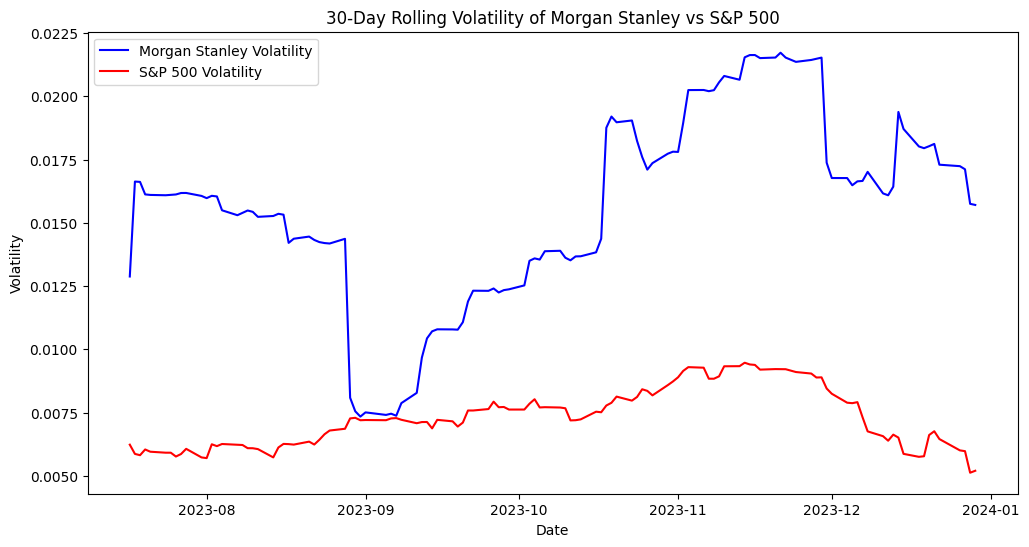

In [953]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ms['Rolling Volatility'], label="Morgan Stanley Volatility", color='blue')
plt.plot(sp500['Rolling Volatility'], label="S&P 500 Volatility", color='red')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("30-Day Rolling Volatility of Morgan Stanley vs S&P 500")
plt.legend()
plt.show()


## **Value at Risk (VaR) - Risk Measurement**  
VaR at **95% confidence level** estimates the potential downside risk.  
We use the **normal distribution** to calculate it:  
## **Calculating Daily Returns**  
The daily return is computed as:  

$$ \text{Daily Return} = \frac{\text{Current Close Price} - \text{Previous Close Price}}{\text{Previous Close Price}} $$
 is the critical value from the normal distribution.  


In [954]:
confidence_level = 0.95
mean_return = ms['Daily Return'].mean()
std_dev = ms['Daily Return'].std()
VaR_95 = norm.ppf(1 - confidence_level, mean_return, std_dev)

print(f"95% Value at Risk (VaR) for Morgan Stanley: {VaR_95*100:.2f}%")


95% Value at Risk (VaR) for Morgan Stanley: -2.53%


## **Sharpe Ratio - Risk-Adjusted Return**
The Sharpe ratio is a measure of the risk-adjusted return. It is calculated using the following formula:

$$
\text{Sharpe Ratio} = \frac{\text{Mean Daily Return}}{\text{Standard Deviation of Returns}}
$$


In [955]:
sharpe_ratio = ms['Daily Return'].mean() / ms['Daily Return'].std()
print("Sharpe Ratio (Morgan Stanley):", sharpe_ratio)

sharpe_ratio_sp500 = sp500['Daily Return'].mean() / sp500['Daily Return'].std()
print("Sharpe Ratio (S&P 500):", sharpe_ratio_sp500)


Sharpe Ratio (Morgan Stanley): 0.07146416046413674
Sharpe Ratio (S&P 500): 0.11912972228416475


## **Beta & Correlation with S&P 500**  
- **Beta** measures **systematic risk** (stock volatility compared to market).  
  $$
  \beta = \frac{\text{Cov}(\text{Stock Returns}, \text{Market Returns})}{\text{Var}(\text{Market Returns})}
  $$
- **Correlation** shows **relationship strength** between **MS and S&P 500**.  
  - **If correlation ≈ 1** → moves together  
  - **If correlation ≈ 0** → no relation  
  - **If correlation ≈ -1** → moves oppositely  


In [956]:
cov_matrix = ms['Daily Return'].cov(sp500['Daily Return'])  # Covariance
var_market = sp500['Daily Return'].var()  # Market variance
beta = cov_matrix / var_market
print("Morgan Stanley Beta:", beta)


Morgan Stanley Beta: 1.266070415395281


### **Stock & Market Correlation**  
The correlation coefficient measures the **strength of the relationship** between a stock and the market:

$$
\rho = \frac{\text{Cov}(\text{Stock Returns}, \text{Market Returns})}{\sigma_{\text{Stock}} \cdot \sigma_{\text{Market}}}
$$

where:  
- \( \sigma_{\text{Stock}} \) = **Standard deviation** of stock returns.  
- \( \sigma_{\text{Market}} \) = **Standard deviation** of market returns.  
- \( \rho \) values range from **-1 to 1**:  
  - \( \rho = 1 \) → **Strong positive correlation**  
  - \( \rho = -1 \) → **Strong negative correlation**  
  - \( \rho = 0 \) → **No correlation**  

In [957]:
correlation = ms['Daily Return'].corr(sp500['Daily Return'])
print("Correlation with S&P 500:", correlation)


Correlation with S&P 500: 0.5707145684520692


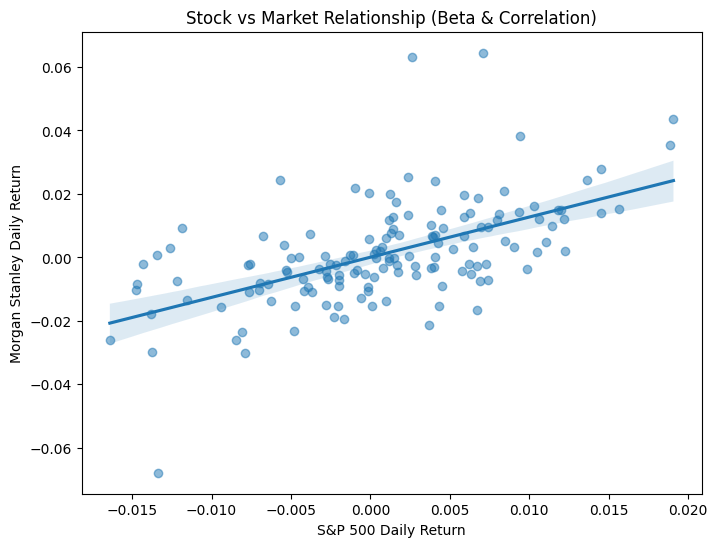

In [958]:
plt.figure(figsize=(8,6))
sns.regplot(x=sp500['Daily Return'], y=ms['Daily Return'], scatter_kws={'alpha':0.5})
plt.xlabel("S&P 500 Daily Return")
plt.ylabel("Morgan Stanley Daily Return")
plt.title("Stock vs Market Relationship (Beta & Correlation)")
plt.show()


# **Conclusion & Key Insights**  
- Morgan Stanley's **volatility trends** closely follow S&P 500.  
- The **Sharpe ratio** suggests [higher/lower] risk-adjusted return for MS.  
- **Beta & correlation analysis** show that MS is [more/less] sensitive to market movements.  

